# **Linear Regression**

**Linear regression** is a statistical method used for modeling the relationship between a *dependent variable* and one or more *independent variables* by fitting a linear equation to the observed data. 

It is primarily used for _predictive analysis_ and is a fundamental technique in machine learning and statistics.

## **Context**

### **Instructions**



The following steps are required to complete the assignment:

- Compute Cost Function
- Make a function that run gradient descent
- Compute Cost Function for multivariate Linear Regression
- Compute Cost for multivariate Gradient Descent
- Do the feature normalization
- Make a function that computes the normal equation.

### **Dataset**



For this assignment, we will use the **Vehicle Dataset** from Cardekho. This dataset contains 1 target, 8 features and 302 instances.

The link to it can be found [here](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho).

**The target is:**
- `Selling_Price`: This column indicates the selling price of the car. It's the price at which the car is being sold.

**The features are:**
- `Car_Name`: This column contains the names or models of the cars in the dataset. Each row represents a specific car model.
- `Year`: This column represents the year in which the car was manufactured or registered.
- `Present_Price`: This column represents the current market price of the car. It's the price at which the car was originally purchased.
- `Kms_Driven`: This column specifies the total distance (in kilometers) the car has been driven.
- `Fuel_Type`: This column indicates the type of fuel the car uses, such as Petrol, Diesel, or CNG (Compressed Natural Gas).
- `Seller_Type`: This column indicates the type of seller for the car. It might have categories like "Dealer" or "Individual".
- `Transmission`: This column specifies the type of transmission the car has. It could be "Manual" or "Automatic". 
- `Owner`: This column indicates the number of previous owners the car has had. 


## **Model Setup**

### **Environment**


Before we can get into analysis, we need to set up the environment with all the libraries and functions that we will need.

#### Import Libraries

In [1]:
# Imported Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Loading the data
data = pd.read_csv('../data/carData.csv')

In [2]:
# Printing the first 5 rows of the data
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Function Definitions

In [3]:
# Linear Regression Class
class LinearRegressionClass:

    # Initialize LinearRegression
    def __init__(self, learningRate = 0.01, iterations = 100, batchSize = 16):
        self.batchSize = batchSize
        self.learningRate = learningRate
        self.iterations = iterations
        self.cost = []
        self.coefficient = None

    # Get the next batch of features and targets
    def getNextBatch(self, x, y):
        m = x.shape[0]

        size = self.batchSize

        for i in range(0, m, size):
            yield ( x[i : i + size], y[i : i + size] )

    # Calculates the cost of the hypothesis
    def calculateCost(self, hypothesis, target):
        s = hypothesis.shape[0]
        return (1 / s) * 0.5 * np.sum((hypothesis - target)**2)

    # Performs the backwards propagation
    def backwardsPropagate(self, x, y, h, theta, no_samples):
        n = theta.shape[0]

        theta[0] = theta[0] - (self.learningRate * 2 / no_samples) * np.sum(h - y)

        for i in range(1, n):
            theta[i] = theta[i] - (self.learningRate * 2 / no_samples) * np.sum((h - y) * np.transpose(x)[i])

        return theta

    # Calculates the hypothesis
    def hypothesis(self, x, theta):
        m = x.shape[0]
        n = x.shape[1]

        hypothesis = np.ones((m, 1))

        theta = theta.reshape(1, n)

        for i in range(m):
            hypothesis[i] = np.dot(theta, x[i])

        return hypothesis.reshape(m)

    # Fit the model
    def fit(self, x, y):
        samplesNum = x.shape[0]
        featuresNum = x.shape[1]

        bias = np.ones((samplesNum, 1))
        theta = np.random.randn(featuresNum+1) * 0.001

        x = np.concatenate((bias, x), axis = 1)

        self.cost = []

        for _ in range(self.iterations):
            
            loss = []
            for _, (batchX, batchY) in enumerate(self.getNextBatch(x, y)):
                h = self.hypothesis(batchX, theta)

                cost = self.calculateCost(h, batchY)
                loss.append(cost)

                theta = self.backwardsPropagate(batchX, batchY, h, theta, samplesNum)

            self.cost.append(sum(loss)/len(loss))

        self.coefficient = theta
    
        return self

    # Predict the target
    def predict(self, x : np.ndarray):
        m = x.shape[0]

        bias = np.ones((m, 1))
        x = np.concatenate((bias, x), axis = 1)

        hypothesis = self.hypothesis(x, self.coefficient)

        return hypothesis

# Creates a scatter plot of the given data
def create_scatter_plot(dataframe, x_column, y_column):
    fig, ax = plt.subplots(figsize=(6, 2))
    ax.scatter(dataframe[x_column], dataframe[y_column])
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    
    if(x_column == "Kms_Driven"):
        ax.axvline(x=480000, color='r', linestyle='-',)
    else:
        ax.axhline(y=30, color='r', linestyle='-')

    plt.show()

In [4]:
# Split the data into training and testing sets.
def train_test_split(X, y, test_size=0.25, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    m = X.shape[0]
    index = np.arange(m)
    np.random.shuffle(index)

    size = int(m * test_size)

    X_train = X[index[size:]]
    y_train = y[index[size:]]
    X_test = X[index[:size]]
    y_test = y[index[:size]]

    return X_train, X_test, y_train, y_test

### **Dataset Preparation**

Before we start using the dataset, we must first prepare it.

#### Column Preparation

In [5]:
# Removing unwanted columns
data.drop('Car_Name', axis=1, inplace=True)

# Converting the year column to number of years and renaming it
data['Year'] = 2023 - data['Year']
data.rename(columns={'Year': 'Age'}, inplace=True)

# Perform one-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

data.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,9,3.35,5.59,27000,0,False,True,False,True
1,10,4.75,9.54,43000,0,True,False,False,True
2,6,7.25,9.85,6900,0,False,True,False,True
3,12,2.85,4.15,5200,0,False,True,False,True
4,9,4.60,6.87,42450,0,True,False,False,True


#### Removing Missing Values and Outliers

In [6]:
# Check for missing values
data = data.dropna()
print(data.isnull().sum())

Age                       0
Selling_Price             0
Present_Price             0
Kms_Driven                0
Owner                     0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
dtype: int64


<Figure size 2000x1500 with 0 Axes>

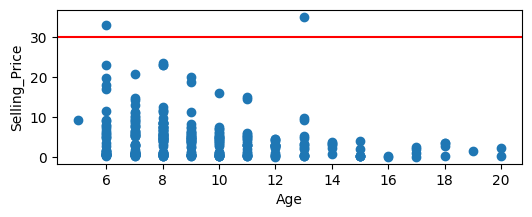

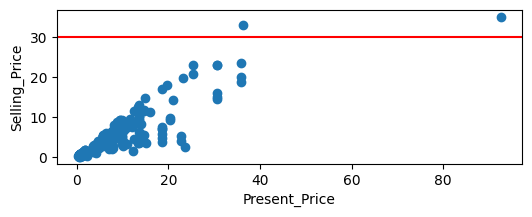

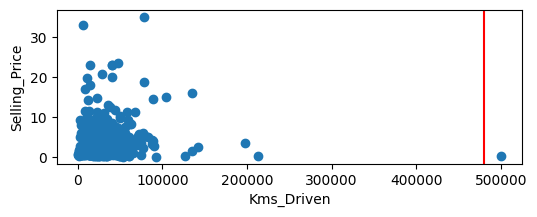

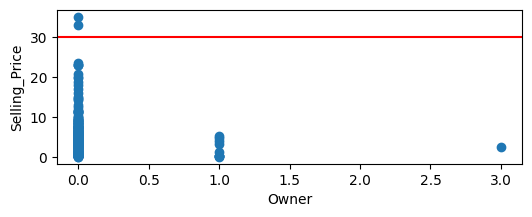

In [7]:
# Visualizing Data to show Outliers
fig=plt.figure(figsize=(20,15))
fs=mpl.gridspec.GridSpec(2,2)

create_scatter_plot(data,'Age','Selling_Price')
create_scatter_plot(data, 'Present_Price', 'Selling_Price')
create_scatter_plot(data, 'Kms_Driven', 'Selling_Price')
create_scatter_plot(data, 'Owner', 'Selling_Price')

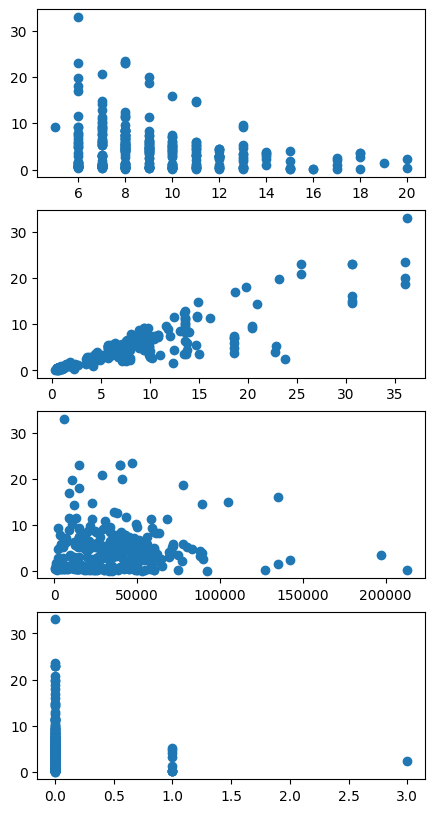

In [8]:
# The outliers are removed from the dataset
data.drop(index=[86,196],inplace=True)

# Plot without outliers
data_show=['Age','Present_Price','Kms_Driven','Owner']
fig , ax=plt.subplots(4,1,figsize=(5,10))

for index,item in enumerate(data_show):
    ax[index].scatter(data[item],data['Selling_Price'])

#### Splitting the Dataset



In [9]:
X = data.drop(columns=['Selling_Price'])
y = data['Selling_Price']

## **Implementation**

### **Visualizing the Data**

Text(0, 0.5, 'Selling_Price')

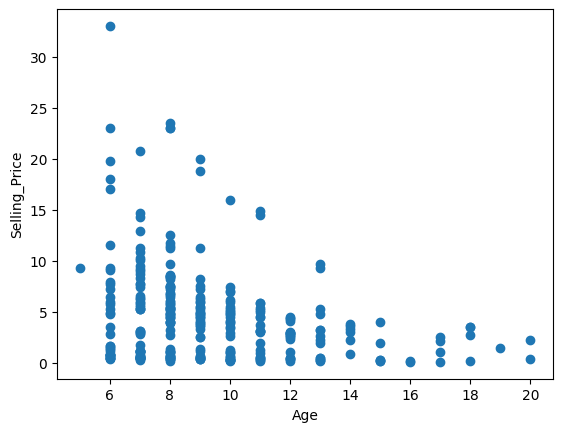

In [10]:
# Plotting Selling_Price against Year
plt.scatter(X['Age'], y)
plt.xlabel('Age')
plt.ylabel('Selling_Price')

<Axes: >

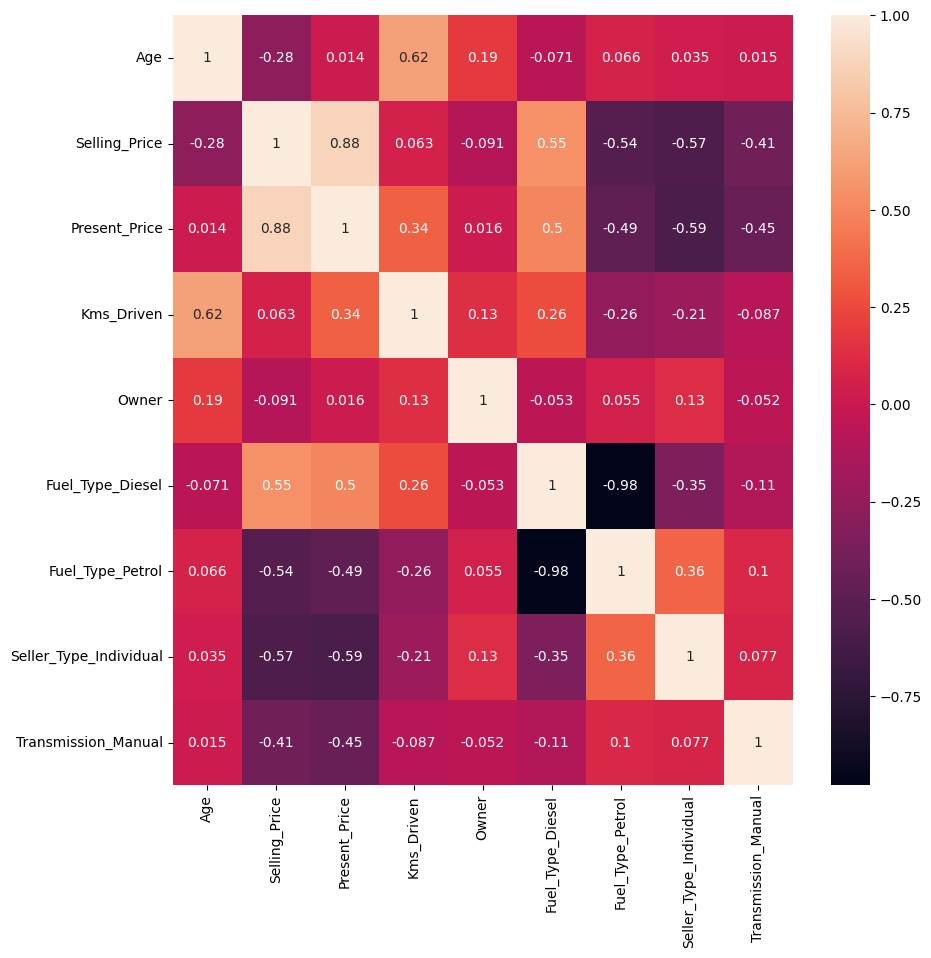

In [11]:
# Correlation Matrix
correlationMatrix = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlationMatrix, annot=True)

Text(0, 0.5, 'Selling_Price')

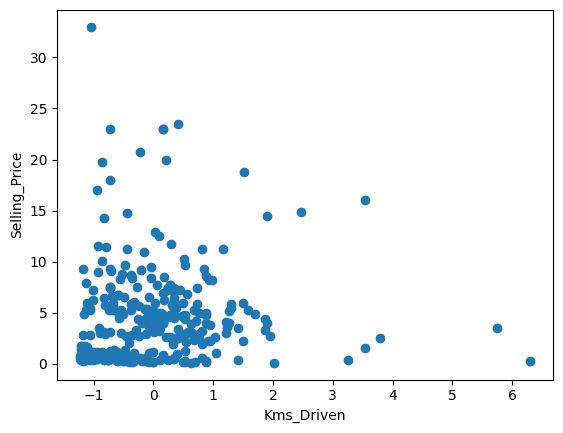

In [12]:
# All features except Selling_Price (target)
X = data.drop(columns=['Selling_Price']).astype('float')

# Target (Selling_Price)
y = data['Selling_Price'].astype('float')

# Normalizing the data
X = (X - X.mean()) / X.std()

# Plotting
plt.scatter(X['Kms_Driven'], y)
plt.xlabel('Kms_Driven')
plt.ylabel('Selling_Price')

### **Fit Linear Regression Model**

In [13]:
# Initializing the model
model = LinearRegressionClass(iterations=150)

# Fitting the model
model.fit(X, y)

### **Plotting Cost Function**

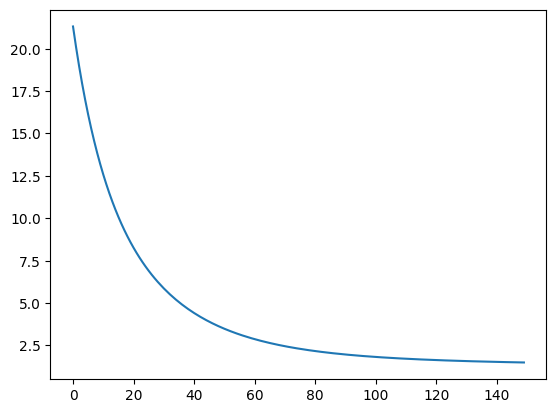

In [14]:
# Plotting the cost
cost = model.cost
plt.plot(cost)